### Trabajo Practico 2

In [22]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

 Ejercicio 1 - Generación de señales 
 ---------------

Generaremos muestras a partir de la siguiente señal continua

\begin{equation}
    \label{x}
    x(t) = \sin(2\pi f_0 t) + \cos(2\pi f_1 t)
\end{equation}



donde  $f_0 = 2$Hz y $f_1 = 3f_0$.

**1.1** Implemente una función  def $x(t)$   que devuelve los valores de $x(t)$ de una lista de valores en formato numpy.

In [23]:
f0 = 2
f1 = 3*f0
def x(t):
    return np.sin(2*np.pi*f0*t)+np.cos(2*np.pi*f1*t)

**1.2** Genere una señal con un muestreo fino a una frecuencia de muestreo $f_{s0} = 1000$Hz sobre $N_0 = 1024$ muestras:

- Genere un arreglo $t_0$ de $N$ muestras temporales de valores $t = \frac{n}{f_{s0}}$.
        
- Evalue la función $x$ en el vector de tiempo $t_0$ y almacene los valores resultantes $x [n]$ en un vector $x_0$.
        
- Trace la señal con el eje de tiempo correcto en segundos.

Text(0.5, 0, 't0 [s]')

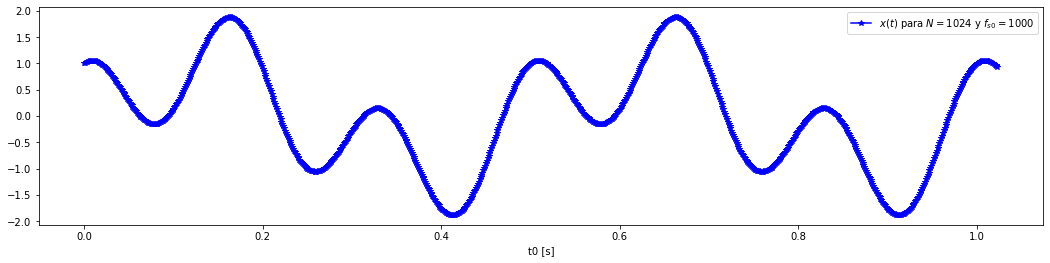

In [24]:
N0 = 2**10  # 1024
fs0 = 1000

step = 1./fs0
init = 0
end = step*N0
t0 = np.arange(init, end, step)

x0 = x(t0)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t0, x0, 'b-*',  label='$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.legend()
ax.set_xlabel('t0 [s]')

**1.3** Genere una señal  $x_n$ con una frecuencia de muestreo $f_s = 20$ sobre $N = f_s$ muestras (muestreo de 1 segundo).

(20,)


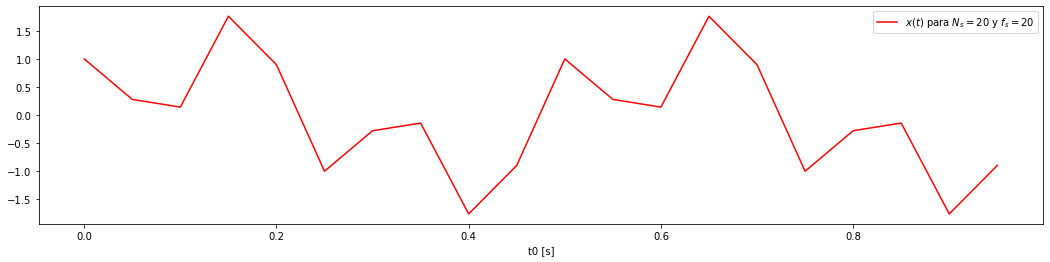

In [25]:
fs = 20
Ns = fs

step = 1./fs
init = 0
end = step * Ns
tn = np.arange(init, end, step)


xn = x(tn)

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(tn, xn, 'r-',  label='$x(t)$ para $N_{s}=20$ y $f_{s}=20$')
ax.legend()
ax.set_xlabel('t0 [s]')
print(xn.shape)

**1.4** Grafique simultáneamente $x_0$ y $x_n$. Para $x_n$, use el estilo de trazado ``-o'' para ver la posición de las muestras.

Text(0.5, 0, 't0 [s]')

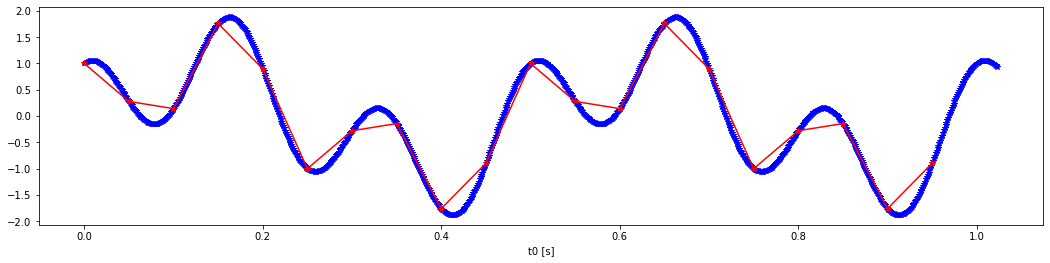

In [26]:
fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(t0, x0, 'b-*',  label='$x(t)$ para $N=1024$ y $f_{s0}=1000$')
ax.plot(tn, xn, 'r-*',  label='$x(t)$ para $N=20$ y $f_{s}=20$')
ax.set_xlabel('t0 [s]')

 Ejercicio 2 - Reconstrucción de señales
 ---------------

**2.1**¿Cuál es la frecuencia de muestreo necesaria $f_{s}$ para garantizar que la señal x(t) puede reconstruirse?

Segúnel teorema de Nyquist-Shannon, nos habla de que:

Sea f señal con transformada de Fourier con soporte compacto en $[- \frac{\pi}{T}, \frac{\pi}{T}]$. Entonces f puede ser reconstruida interpolando sus muestras a distancia T:

$$f(t) = \sum_{n \in X} f(nT)\cdot h_{T}(t - nT)$$


Donde, $h_{T}(t)$ es el seno cardinal

Calculando

$$ \hat{x}(\omega) = \frac{1}{2}[i(\delta (\omega - 4\pi) - \delta ( \omega + 4\pi)) + ( \delta (\omega + 12\pi) + \delta (\omega - 12\pi))] $$

Por lo tanto el soporte compacto es donde $\frac{\pi}{T} = \pi \cdot f_{s} = 12\pi$, por lo tanto, $f_{s} = 12Hz$. 

**2.2** Programe una función def recsinc($x_{s}$,$t_{s}$,$f_{s}$,$t$) que recosntruya una señal en el tiempo t a partir de muestras $x_{s}$,$t_{s}$ a la frecuencia $f_{s}$

In [27]:
def recSinc(xs, ts, fs, t):
    rec = [] #lista vacia
    for i in t:
        np.array(rec.append(np.sum(xs*np.sinc(np.pi*fs*(i - ts)))))#tomando el seno cardinal para reconstruir
    return rec

**2.3** Grafique simultaneamente $x_{0}$ y la interpolación de $x_{n}$ en $t_{0}$ ¿ Qué pasa en el borde de la ventana de muestreo?

fs = 12 
ts = np.arange(0, 1, 1/fs)
xs = x(ts)
#creamos la nueva señal al igual que el ejemplo del item 1
fig, ax = plt.subplots (1, figsize = (18, 4))
ax.plot(t0, x0, 'r-', label = '$x(t)$')
ax.plot(t0, recSinc(xs, ts, fs, t0), 'b-', label = 'interpolación')
ax. legend()

**2.4** Modifique la frecuencia de muestreo de $f_{s}=20$ a $f_{s}=10$.¿Qué sucede con la reconstrucción?

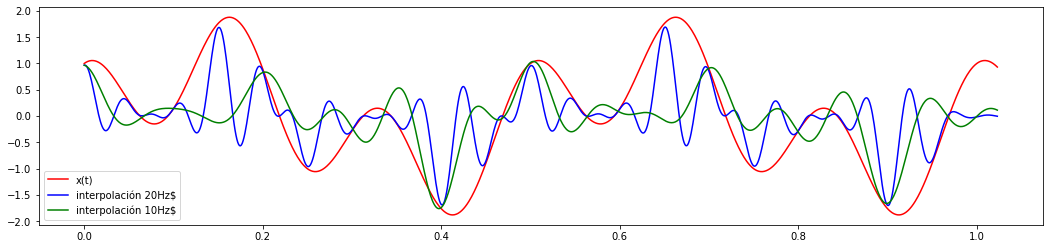

In [29]:
f20 = 20
t20 = np.arange(0, 1, 1/f20)
x20 = x(t20)
f10 = 10
t10 = np.arange(0, 1, 1/f10)
x10 = x(t10)
fig, ax = plt. subplots (1, figsize = (18, 4))
ax.plot(t0, x0, 'r-', label = 'x(t)')
ax.plot(t0, recSinc(x20, t20, f20, t0), 'b-', label = 'interpolación 20Hz$')
ax.plot(t0, recSinc(x10, t10, f10, t0), 'g-', label = 'interpolación 10Hz$')
ax.legend()

Se observa un constante progreso al reconstruir la señal original aunque esto sería más notorio en casos con fs mayores

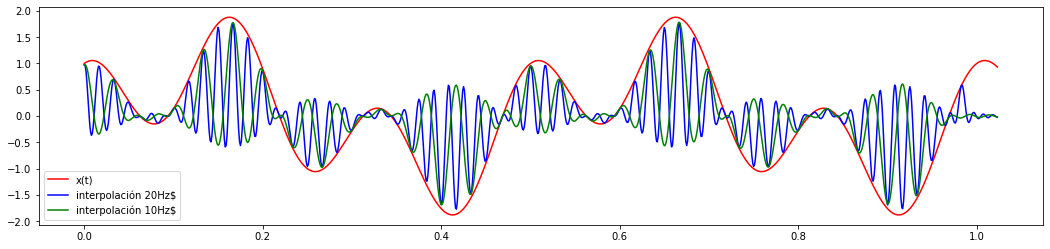

In [30]:
f20 = 60
t20 = np.arange(0, 1, 1/f20)
x20 = x(t20)
f10 = 30
t10 = np.arange(0, 1, 1/f10)
x10 = x(t10)
fig, ax = plt. subplots (1, figsize = (18, 4))
ax.plot(t0, x0, 'r-', label = 'x(t)')
ax.plot(t0, recSinc(x20, t20, f20, t0), 'b-', label = 'interpolación 20Hz$')
ax.plot(t0, recSinc(x10, t10, f10, t0), 'g-', label = 'interpolación 10Hz$')
ax.legend()

 Ejercicio 3 - Generacion de señales de audio
 ---------------

1. En esta parte trabajaremos con secuencias de audio.
2. Para hacer eso usaremos *librosa* para cargar y guardar archivos en formato .wav. 
3. También es posible escuchar audio directamente en Python usando la libreria de manipulacion audio *sounddevice* que se puede instalar con pip o conda.

*Nota: cuando se trabaja en un ambiente virtual o en un subsistema como WSL (Windows Subsystem Linux) es mas complicado, pero no imposible, escuchar audio directamente desde una consola Python o un notebook Jupyter, pues se requiere crear un servidor audio para que el sistema hosted pueda acceder a la tarjeta de sonido del sistema host.* 

En esta seccion las señales generadas solo seran escuchadas y trazadas, pero estudiaremos sus componentes de frecuencia en el siguiente TP.

**3.1** Genere 1 segundo de una onda sinusoidal de magnitud $0.5$ y de frecuencia $f_0 = 425$Hz muestreada a
$fs = 8000$Hz. Guardelo como un archivo *.wav* y escuche el archivo o escuche directamente la señal desde
python. Este es el tono de marcado de los teléfonos europeos.

Text(0, 0.5, 'amplitud')

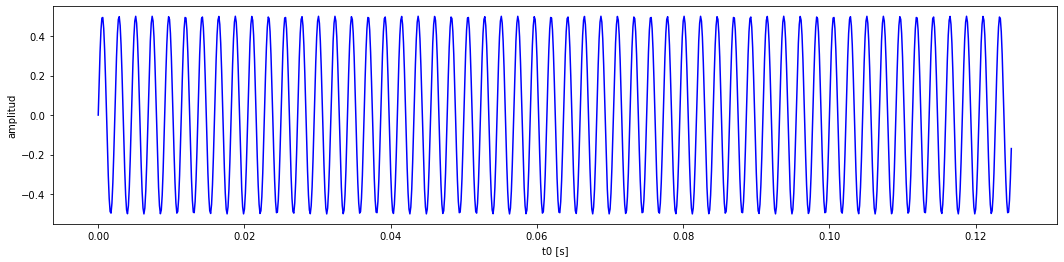

In [155]:
def nota(a, f, t):
    return a*np.sin(2*np.pi*f*t)
tw = np.arange(0, 1, 1./8000)
aw = 0.5
fw = 440
la440 = nota(a=aw, f=fw, t=tw)
wavfile.write(filename='la440.wav', rate=8000, data=la440)
fig, ax = plt.subplots(1, 1,figsize=(18,4))
ax.plot(tw[:1000], la440[:1000], 'b-',  label='la 440')
ax.set_xlabel('t0 [s]')
ax.set_ylabel('amplitud')

**3.2** Es posible generar notas musicales a partir de su numero MIDI m donde la frecuencia se expresa como

$$f_m = 440 · 2^{\frac{m-69}{12}}$$.

Vemos que hay $12$ semitonos para pasar de una nota a su octava.

La nota MIDI $m = 69$ es la LA 4 en notacion europea y es el estandar de tono utilizado para afinar instrumentos para conciertos.


Implemente una funcion *def getNote (m, fs, l)* que devuelve la nota $m$ tocada durante $l$ segundos a la frecuencia $f_s$.

In [156]:
def getNote (m, fs, l):
    t = np.arange(0, l, 1./fs)
    f = 440*pow(2,((m-69)/12))
    return nota(a=.5, f=f, t=t)


In [157]:
wavfile.write(filename='A4_16kHz.wav', rate=16000, data=getNote(m=69, fs=16000, l=2))
wavfile.write(filename='A8_8kHz.wav', rate=8000, data=getNote(m=117, fs=8000, l=2))

**3.3** ¿Que sucede con el con m=117 a fs=8000? es más agudo el nuevo tono

**3.4** Codifique una secuencia de concatenación de notas [70,72,68,56,63] (1 segundo de cada una) y guarde la secuencia como archivo "seq.wav".
.¿Le suena la secuencia?.

In [158]:
wavfile.write(filename='70.wav', rate=8000, data=getNote(m=70, fs=8000, l=1))
wavfile.write(filename='72.wav', rate=8000, data=getNote(m=72, fs=8000, l=1))
wavfile.write(filename='68.wav', rate=8000, data=getNote(m=68, fs=8000, l=1))
wavfile.write(filename='56.wav', rate=8000, data=getNote(m=56, fs=8000, l=1))
wavfile.write(filename='63.wav', rate=8000, data=getNote(m=63, fs=8000, l=1))
a=getNote(m=70, fs=8000, l=1)
b=getNote(m=72, fs=8000, l=1)
c=getNote(m=68, fs=8000, l=1)
d=getNote(m=56, fs=8000, l=1)
e=getNote(m=63, fs=8000, l=1)
f=np.concatenate((a,b,c,d,e),axis=0)
wavfile.write(filename='seq.wav', rate=8000, data=f)

D

**3.5** La saturación puede ocurrir cuando los amplificadores alcanzan su máxima amplitud. El efecto
de la saturación puede ser reproducido usando un "clipeo" en un seno.
Compare la señal de la nota m=69 a 440 hz para diferentes valores de recorte. Guarde la nota usando el
"clipeo" en un archivo "A4clip.wav". ¿Cual es el efecto de la saturación en el contenido frecuencial de la señal?

In [159]:
z=getNote (69, 16000, 1)
zn=[]
tz=len(z)

In [175]:
def clipeo(recorte):
    for i in range(tz):
        if z[i]>recorte: 
            zn.append(recorte)
        elif z[i]<(-1*recorte):
            zn.append(-1*recorte)
        else:
            zn.append(z[i])
    return np.array(zn)

In [176]:
wavfile.write(filename='A4clip.wav', rate=8000, data=clipeo(0.075))

In [174]:
wavfile.write(filename='A4clip2.wav', rate=8000, data=clipeo(0.06))

In [ ]:
wavfile.write(filename='A4clip3.wav', rate=8000, data=clipeo(0.05))

**3.6** Genere la señal
\begin{equation}
    \label{x}
    x(t) = \sin(2\pi (w_{0}t+\frac{c}{2}t^2)) 
\end{equation}
con $f_{0}=100hz$ y c=500 durante 1 segundo a una frecuencia de muestreo $f_{s}=8000hz$. esta señal se llama 
"chirp" y corresponde a una mudalación de frecuencia. guarde la señal en el archivo "chirp.wap"

In [140]:
def nota2(t, omegacero):
    return np.sin(2*np.pi*(omegacero*t+250*t*t))

In [170]:
tk = np.arange(0, 10, 1./8000)
fk = 100
omegacerok=2*np.pi*fk                   
wavfile.write(filename='chirp.wav', rate=8000, data=nota2(t=tk,omegacero=omegacerok))